# Composite CMD from Gaia open clusters

We use data from this paper: https://ui.adsabs.harvard.edu/abs/2020A%26A...640A...1C/abstract

The data is available in two different tables, one listing cluster parameters, and the other one listing the members of each clusters: https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/A+A/640/A1

In [2]:
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%%time
data_from_vizier = Vizier(catalog="J/A+A/640/A1",row_limit=-1).query_constraints()
data_from_vizier

CPU times: user 9.05 s, sys: 150 ms, total: 9.2 s
Wall time: 9.26 s


TableList with 2 tables:
	'0:J/A+A/640/A1/table1' with 20 column(s) and 2017 row(s) 
	'1:J/A+A/640/A1/nodup' with 16 column(s) and 234128 row(s) 

In [4]:
cluster_list = data_from_vizier[0]
member_list = data_from_vizier[1]
cluster_list

Cluster,RA_ICRS,DE_ICRS,r50,nbstars07,pmRA_,pmDE,plx,Flag,AgeNN,AVNN,DMNN,DistPc,X,Y,Z,Rgc,SimbadName,_RA.icrs,_DE.icrs
,deg,deg,deg,,mas / yr,mas / yr,mas,,log(yr),mag,mag,pc,pc,pc,pc,pc,,deg,deg
bytes17,float32,float32,float32,int16,float32,float32,float32,bytes14,float32,float32,float32,float32,float32,float32,float32,float32,bytes31,float64,float64
ASCC_10,51.870,34.981,0.558,65,-1.737,-1.368,1.459,NN,8.42,0.63,9.10,660.0,-573.0,258.0,-201.0,8917.0,[KPR2005] 10,51.8700,34.9810
ASCC_101,288.399,36.369,0.372,69,0.934,1.288,2.488,NN,8.69,0.19,8.08,412.0,151.0,374.0,83.0,8197.0,[KPR2005] 101,288.3990,36.3690
ASCC_105,295.548,27.366,0.648,113,1.464,-1.635,1.783,NN,7.87,0.41,8.77,567.0,259.0,504.0,20.0,8096.0,[KPR2005] 105,295.5480,27.3660
ASCC_107,297.164,21.987,0.174,57,-0.155,-5.156,1.109,NN,7.23,1.69,9.70,870.0,449.0,744.0,-28.0,7925.0,[KPR2005] 107,297.1640,21.9870
ASCC_108,298.306,39.349,0.537,188,-0.519,-1.690,0.838,NN,8.03,0.34,10.32,1160.0,310.0,1110.0,122.0,8105.0,[KPR2005] 108,298.3060,39.3490
ASCC_11,53.056,44.856,0.312,245,0.926,-3.030,1.141,NN,8.39,0.60,9.69,867.0,-745.0,421.0,-139.0,9095.0,[KPR2005] 11,53.0560,44.8560
ASCC_110,300.742,33.528,0.203,65,0.271,-3.132,0.497,NN,8.90,0.75,11.47,1971.0,660.0,1856.0,47.0,7900.0,[KPR2005] 110,300.7420,33.5280
ASCC_111,302.891,37.515,0.537,136,-1.150,-1.524,1.166,NN,8.44,0.39,9.65,851.0,224.0,820.0,30.0,8157.0,[KPR2005] 111,302.8910,37.5150


For this plot we will only use the clusters with low extinction, and within a few kiloparsecs.

In [5]:
keep = (cluster_list['DistPc']<3000) & (cluster_list['AVNN']<0.4)

Now we plot:

Text(0, 0.5, 'mass on main sequence (M$_{\\odot}$)')

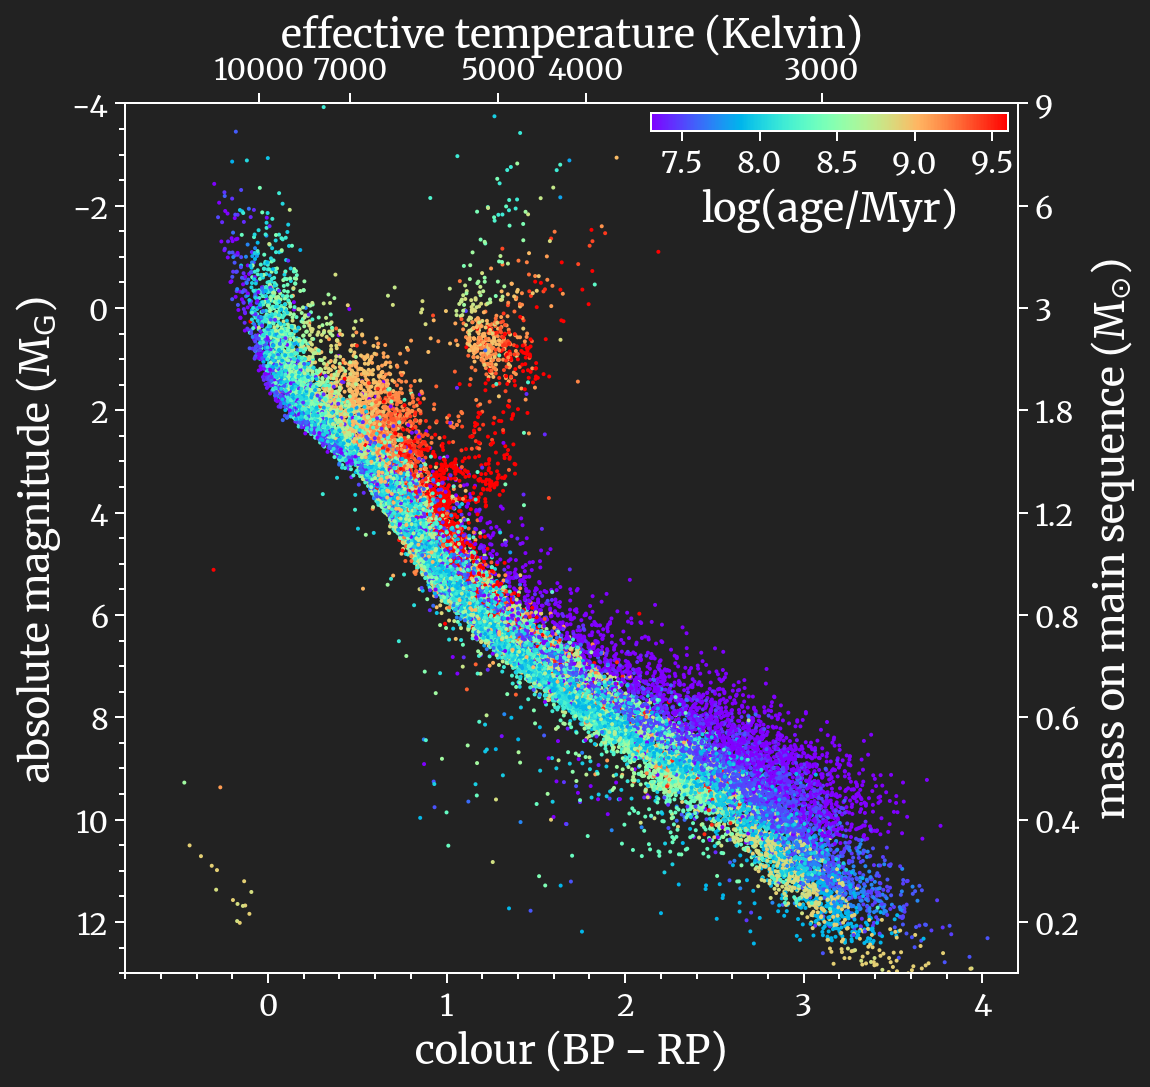

In [6]:
%config InlineBackend.figure_format = "retina"

# Note: some parameters are not accessible from matplotlibrc
# e.g. spines individually, or setting the xlabel and ylabel font separately etc.
plt.rcParams['figure.facecolor'] = '#222222'
plt.rcParams['axes.facecolor'] = '#222222'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
# set tick and box width
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
#
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 1
#
plt.rcParams['axes.linewidth'] = 1
# font size for numbers on the axes:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
# and the names of the axes:
plt.rcParams['axes.labelsize'] = 20


# Font
from matplotlib import font_manager
font_dirs = ['/usr/local/texlive/2021/texmf-dist/fonts/opentype/sorkin/merriweather']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
# set font
plt.rcParams['font.family'] = 'Merriweather'




plt.figure(figsize=(8,8))



for oc in cluster_list['Cluster','AgeNN','DistPc'][keep]:
    #print(oc,'\n')
    oc_members = member_list[  member_list['Cluster'] == oc['Cluster'] ]
    distance_modulus = 5*np.log10( oc['DistPc'] ) - 5
    plt.scatter( oc_members['BP-RP'] , 
                 oc_members['Gmag'] - distance_modulus ,
                 s=1 , c=oc['AgeNN']*np.ones(len(oc_members)) ,
                 vmin=7.3, vmax=9.6 , cmap='rainbow')
    
    
plt.ylim(13,-4)
plt.xlim(-0.8,4.2)

ax = plt.gca()
plt.xlabel('colour (BP - RP)')
plt.ylabel('absolute magnitude (M$_\mathrm{G}$)')
plt.minorticks_on()

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width="40%", height="2%", loc=1) 
plt.colorbar(cax=cbaxes, ticks=[7.5,8,8.5,9,9.5], orientation='horizontal',label='log(age/Myr)')

# add a second x axis at the top:
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks([-0.05,0.46,1.29,1.78,3.1])
ax2.set_xticklabels(['10000','7000','5000','4000','3000'])
ax2.set_xlabel(r"effective temperature (Kelvin)")

# add a second y axis on the right:
ax3 = ax.twinx()
ax3.set_ylim(ax.get_ylim())
ax3.set_yticks(range(-4,14,2))
ax3.set_yticklabels(['9','6','3','1.8','1.2','0.8','0.6','0.4','0.2'])
ax3.set_ylabel(r"mass on main sequence (M$_{\odot}$)")

If you want to see all the available rcParams options, you can type:

    plt.rcParams.keys()